In [65]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [66]:
# 读取数据
all_data = pd.read_csv('data_1.csv')
x,y = all_data.loc[:,all_data.columns!='Tc.1'],all_data.loc[:,"Tc.1"]

In [67]:
#标准化
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [68]:
#使用SVD进行降维
svd = TruncatedSVD(n_components=10)
x = svd.fit_transform(x)

In [69]:
#划分数据集
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=50)

In [70]:
# 创建一个线性回归模型
base_estimator = LinearRegression()
bagging_regressor = BaggingRegressor(n_estimators=20, random_state=50)

# 输入训练数据
bagging_regressor.fit(X_train, y_train)

# 预测
y_pred = bagging_regressor.predict(X_test)

# 计算MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)
# 计算RMSE
rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", rmse)

# 计算R2
r2 = r2_score(y_test, y_pred)
print("R-squared:", r2)



Mean Squared Error: 114.78137250525772
Root Mean Squared Error: 10.713606885883845
R-squared: 0.9024464213672911


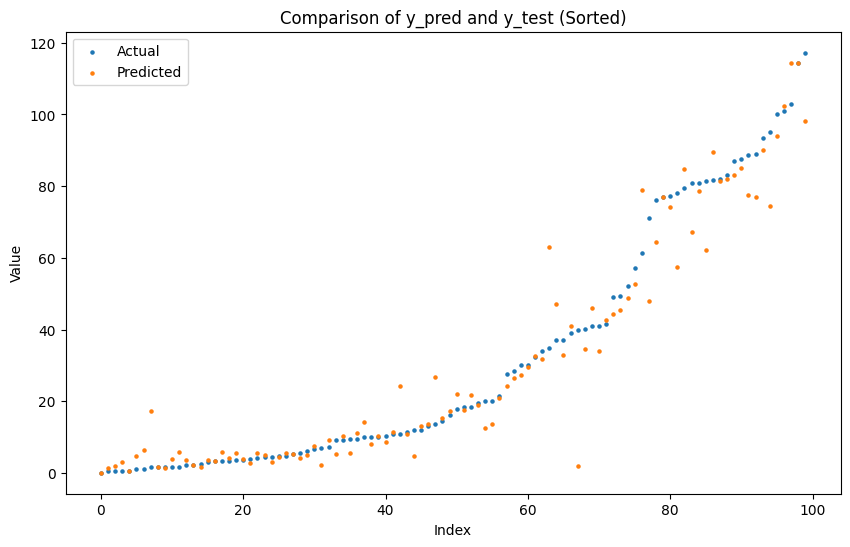

In [71]:
indexs=range(1000)
lst=random.sample(indexs,100)
y_pred_sample=[]
y_test_sample=[]
for i in lst:
    y_pred_sample.append(y_pred[i])
    y_test_sample.append(y_test.iloc[i])
    
sorted_indices = sorted(range(len(y_test_sample)), key=lambda k: y_test_sample[k])
sorted_y_test_sample = [y_test_sample[i] for i in sorted_indices]
sorted_y_pred_sample = [y_pred_sample[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.scatter(range(len(sorted_y_test_sample)), sorted_y_test_sample, label='Actual', s=5)
plt.scatter(range(len(sorted_y_pred_sample)), sorted_y_pred_sample, label='Predicted', s=5)
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison of y_pred and y_test (Sorted)')
plt.legend()
plt.show()


In [72]:
pd.DataFrame(X_train).to_csv('X_train.csv')
pd.DataFrame(X_test).to_csv('X_test.csv')
pd.DataFrame(y_train).to_csv('y_train.csv')
pd.DataFrame(y_test).to_csv('y_test.csv')
np.savetxt('y_pred.txt', y_pred, fmt='%s')
np.savetxt('y_test.txt', y_test, fmt='%s')